## Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks

In [1]:
import os
import time

import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from IPython.display import clear_output
from tensorflow_examples.tensorflow_examples.models.pix2pix import pix2pix

In [2]:
tfds.disable_progress_bar()
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
dataset, metadata = tfds.load('cycle_gan/monet2photo',
                              with_info = True, as_supervised = True)

train_monet, train_photo = dataset['trainA'], dataset['trainB']
test_monet, test_photo = dataset['testA'], dataset['testB']

In [4]:
# Params

BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [5]:
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size = [IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

In [6]:
def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

In [7]:
def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

In [8]:
def preprocess_image_train(image, label):
  image = random_jitter(image)
  image = normalize(image)
  return image

In [9]:
def preprocess_image_test(image, label):
  image = normalize(image)
  return image

In [10]:
# Setup input pipeline

train_monet = train_monet.map(
    preprocess_image_train, num_parallel_calls = AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

train_photo = train_photo.map(
    preprocess_image_train, num_parallel_calls = AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_monet = test_monet.map(
    preprocess_image_test, num_parallel_calls = AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

test_photo = test_photo.map(
    preprocess_image_test, num_parallel_calls = AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(1)

In [11]:
sample_monet = next(iter(train_monet))
sample_photo = next(iter(train_photo))

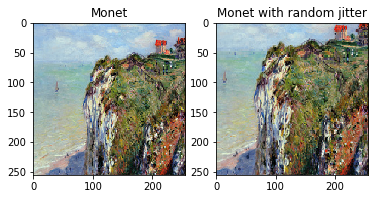

In [12]:
plt.subplot(121)
plt.title('Monet')
plt.imshow(sample_monet[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet with random jitter')
plt.imshow(random_jitter(sample_monet[0]) * 0.5 + 0.5)

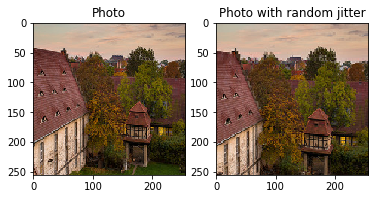

In [13]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(sample_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Photo with random jitter')
plt.imshow(random_jitter(sample_photo[0]) * 0.5 + 0.5)